Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description: Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from pandas.core.common import random_state
from sklearn.cluster import KMeans



In [72]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Hierarchical Clustering

In [73]:
df=pd.read_csv('/content/drive/MyDrive/crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [74]:
#Normalizing the function

In [75]:
scaling=MinMaxScaler()
df_norm=scaling.fit_transform(df.iloc[:,1:])

In [76]:
df_norm


array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [77]:
#Create Dendrogram


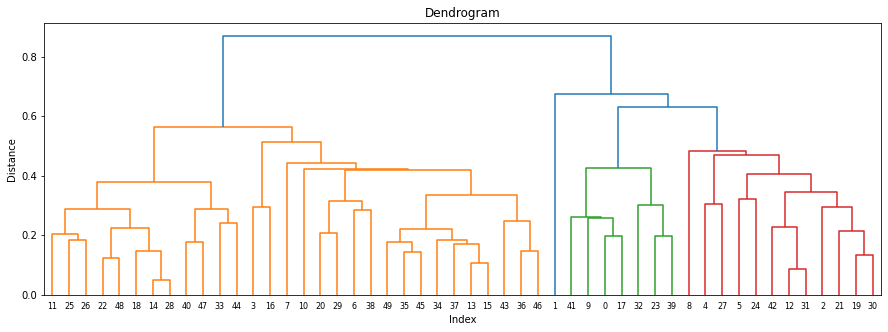

In [78]:
from scipy.cluster.hierarchy import linkage

Z = linkage(df_norm, method='average', metric= 'euclidean')
plt.figure(figsize=(15,5))
plt.title("Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(Z, leaf_rotation=0, leaf_font_size=8)
plt.show()

In [79]:
#Create Cluster
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [80]:
#Build cluster algorithm
y_huc=hc.fit_predict(df_norm)
cluster=pd.DataFrame(y_huc,columns=['cluster'])

In [81]:
df['Cluster']=hc.labels_

In [82]:
df.head(15)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [83]:
df.iloc[:,1:].groupby(df.Cluster).mean()

,Murder,Assault,UrbanPop,Rape,Cluster
Cluster,,,,,
0,14.087500,252.750000,53.500000,24.5375,0.0
1,5.715000,132.300000,70.800000,18.1000,1.0
2,3.180000,78.700000,49.300000,11.6300,2.0
3,10.883333,256.916667,78.333333,32.2500,3.0


From above information , we can say that crime in cluster '0' and '3' are more

#**K-Means Clustering**

In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [85]:
crime_kmeans=pd.read_csv("/content/drive/MyDrive/crime_data.csv")

In [86]:
crime_kmeans.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [87]:
scaler=StandardScaler()
crime_std=scaler.fit_transform(crime_kmeans.iloc[:,1:])
crime_std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

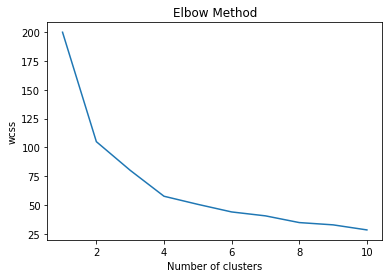

In [88]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(crime_std)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) 
plt.title("Elbow Method")
plt.xlabel('Number of clusters') 
plt.ylabel('wcss')
plt.show()

#Cluster algorithm K=4

In [103]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.0888613219962,
 57.55425863091105,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.311639397122548]

In [99]:
clusters_4 = KMeans(n_clusters=4, random_state= 0)
clusters_4.fit(crime_std)


KMeans(n_clusters=4, random_state=0)

In [100]:
clusters_4.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [90]:
crime_kmeans['Cluster']=cluster_new.labels_

In [91]:
crime_kmeans.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [105]:
crime_kmeans.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.815385,257.384615,76.000000,33.192308
2,3.600000,78.538462,52.076923,12.176923
3,13.937500,243.625000,53.750000,21.412500


From above information . we can say that crime in cluster '1' and '3' are more

#Cluster algorithm K=5

In [106]:
cluster_5=KMeans(n_clusters=5,random_state=0)
cluster_5.fit(crime_std)

KMeans(n_clusters=5, random_state=0)

In [108]:
cluster_5.labels_

array([0, 4, 4, 3, 4, 4, 2, 3, 4, 0, 2, 1, 4, 3, 1, 3, 3, 0, 1, 4, 2, 4,
       3, 0, 4, 3, 3, 4, 1, 2, 4, 4, 0, 1, 3, 3, 3, 3, 2, 0, 1, 0, 4, 2,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [109]:
crime_kmeans['Cluster']=cluster_5.labels_

In [110]:
crime_kmeans

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,4
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,4
9,Georgia,17.4,211,60,25.8,0


In [112]:
crime_kmeans.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,14.671429,251.285714,54.285714,21.685714
1,2.677778,69.888889,49.333333,10.466667
2,4.500000,126.333333,83.500000,16.266667
3,6.333333,136.400000,64.266667,19.100000
4,10.815385,257.384615,76.000000,33.192308


From above information we can say that crime in the cluster '0' and '4'are more 

##DBSCAN

In [115]:
crime_db=pd.read_csv("/content/drive/MyDrive/crime_data.csv")

In [116]:
crime_db.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [119]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
crime_db_scaled=scaler.fit_transform(crime_db.iloc[:,1:])
crime_db_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

#Build dbscan algorithm

In [123]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=2,min_samples=6)
dbscan.fit(crime_db_scaled)

DBSCAN(eps=2, min_samples=6)

In [124]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [126]:
crime_db['Cluster']=dbscan.labels_

In [127]:
crime_db

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


from above information we can say that 'alaska'(2nd record) is noise in our dataset.